In [1]:
import torch

from torchvision import transforms, datasets
import os

from util import showtensor
from resnet import resnet50
from deepdream import make_step



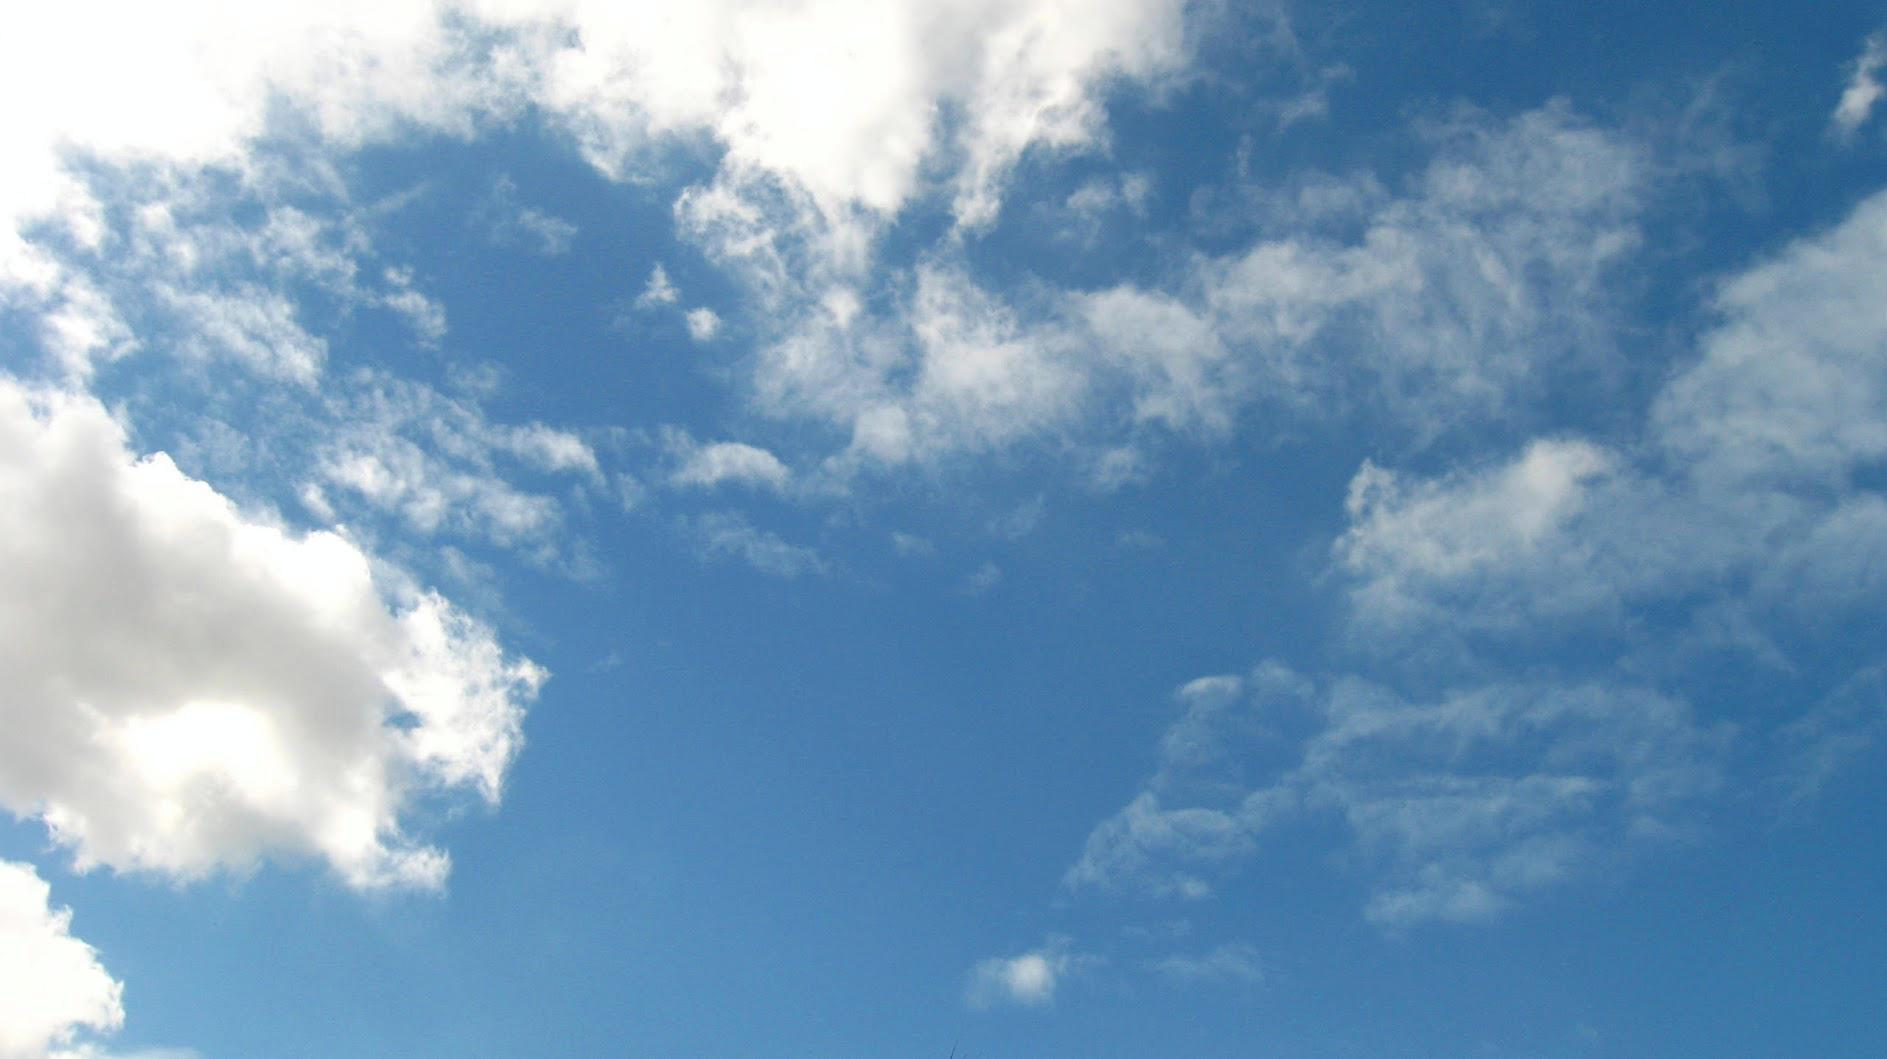

In [2]:
# load the data
transforms = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
dset = datasets.ImageFolder(os.path.join('./data/'), transforms)
dset_loader = torch.utils.data.DataLoader(dset, batch_size=1)
inputs, classes = next(iter(dset_loader))
input_np = inputs.numpy()
showtensor(input_np)

In [3]:
# load the model
model = resnet50(pretrained=True)
model.cuda()
for param in model.parameters():
    param.require_grads = False

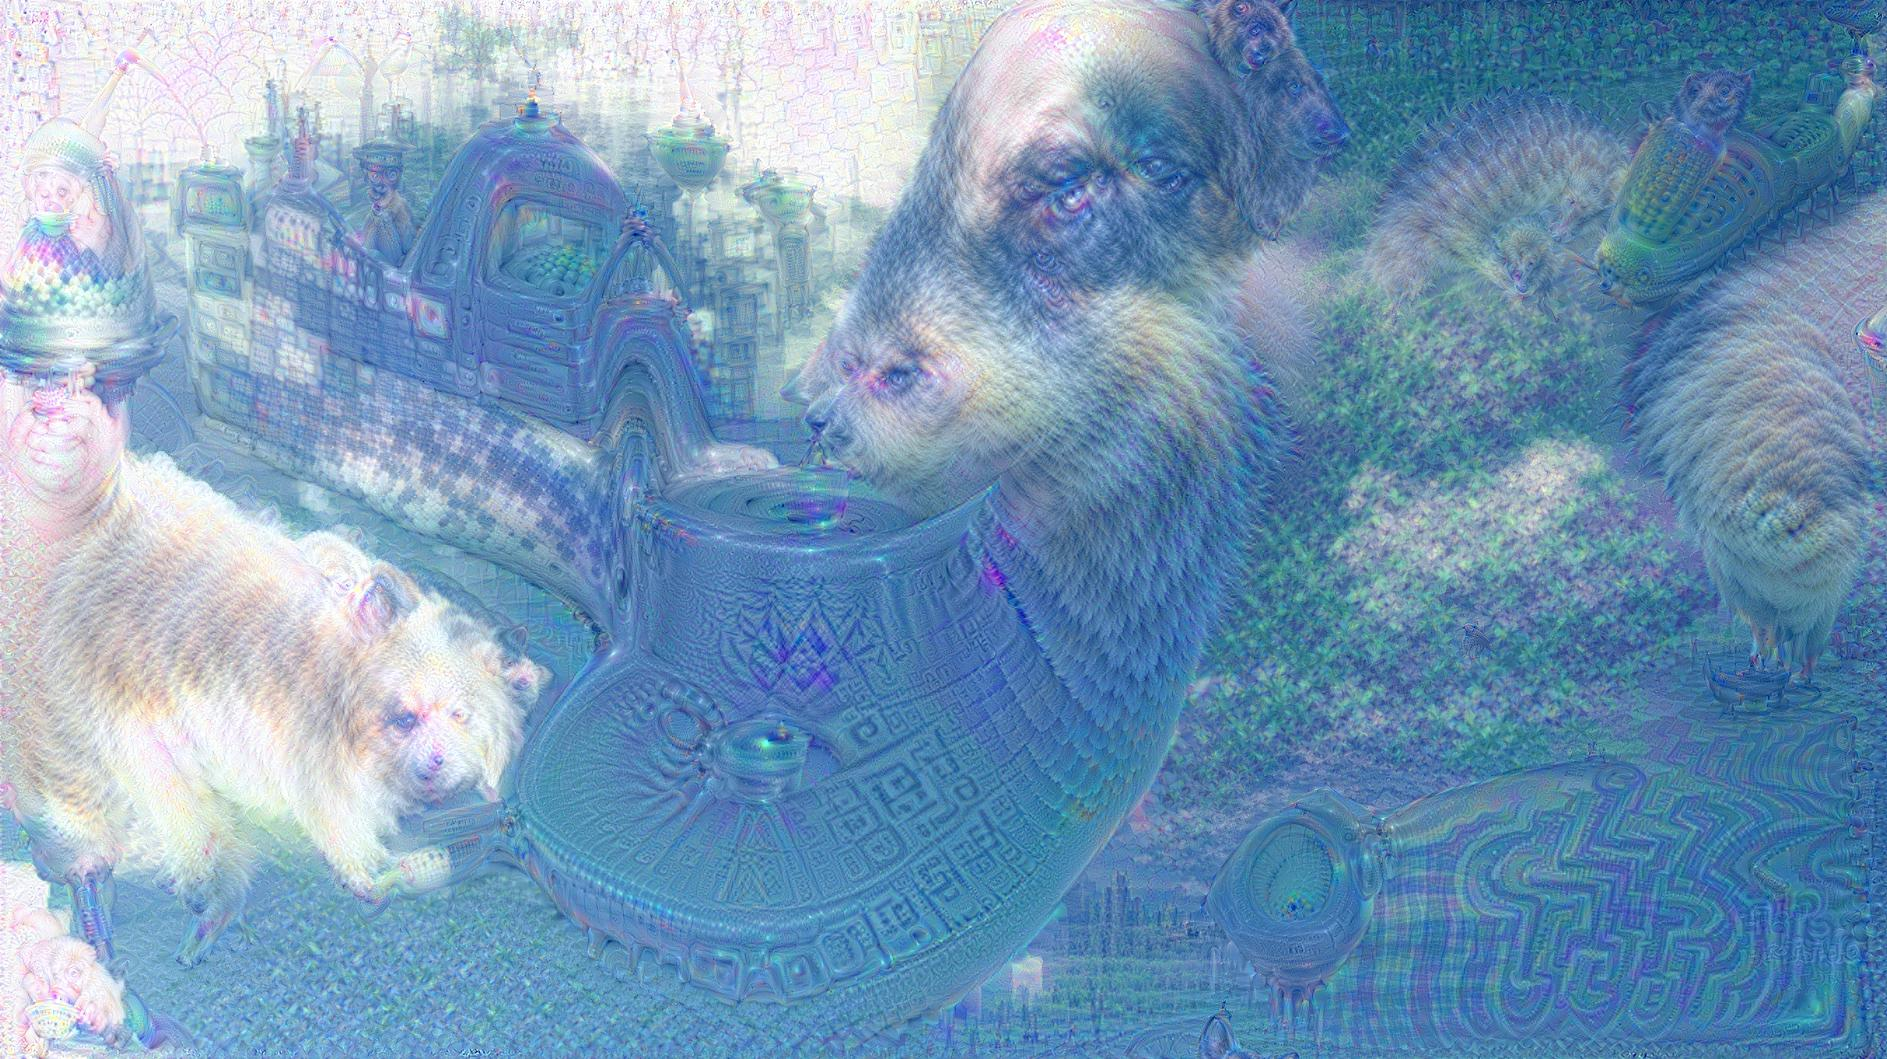

In [4]:
# deep dream
dream(model, input_np, 
          octave_n=6, 
          num_iterations=20, 
          lr=2e-2,
          max_jitter=32,
          show_every=10,
          end_layer=3)